In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("ENTER THE CODE OF STOCK = ")
date=(input("Present date as YYYY-MM_DD = "))
data = yf.download(stocks, "2008-01-01",date,auto_adjust=True)  # downloading data
data.head()   #first 5 data of dataset



ENTER THE CODE OF STOCK = GC=F
Present date as YYYY-MM_DD = 2023-02-25
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [3]:
data.shape   # SIZE OF THE DATA SET

(3813, 5)

In [4]:
data.info()  # information about the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3813 entries, 2008-01-02 to 2023-02-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3813 non-null   float64
 1   High    3813 non-null   float64
 2   Low     3813 non-null   float64
 3   Close   3813 non-null   float64
 4   Volume  3813 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.7 KB


In [5]:
data.describe() # details about the data 


,Open,High,Low,Close,Volume
count,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000
mean,1384.212956,1391.549594,1376.313035,1384.012510,5446.606084
std,297.732397,299.011336,296.511311,297.809099,28807.849082
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1201.699951,1207.800049,1196.199951,1201.500000,45.000000
50%,1312.199951,1318.099976,1307.800049,1312.199951,149.000000
75%,1658.300049,1665.400024,1646.300049,1659.000000,485.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


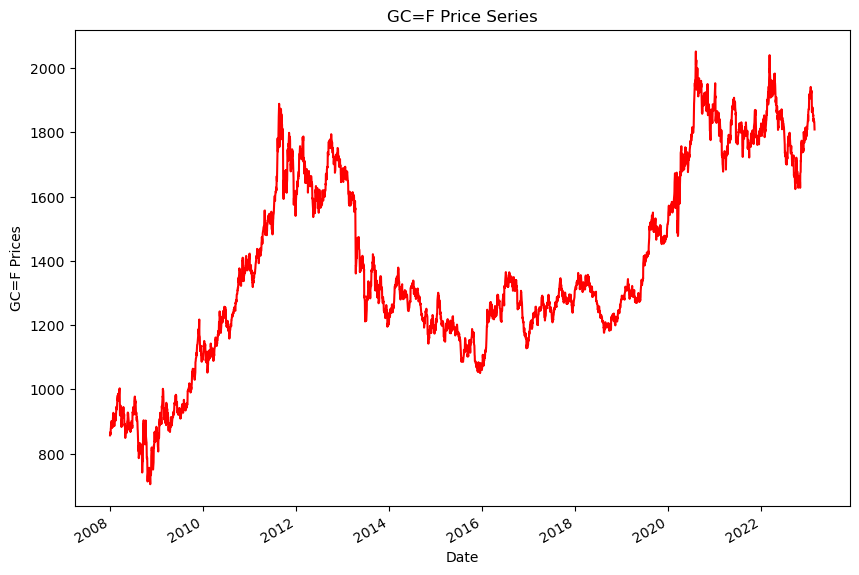

In [6]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

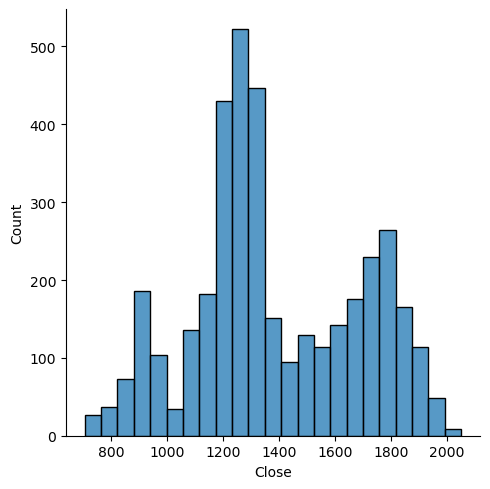

In [7]:
sns.displot(data["Close"])

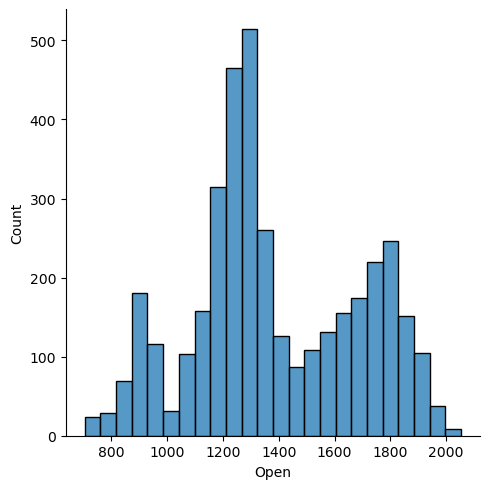

In [8]:
sns.displot(data["Open"])

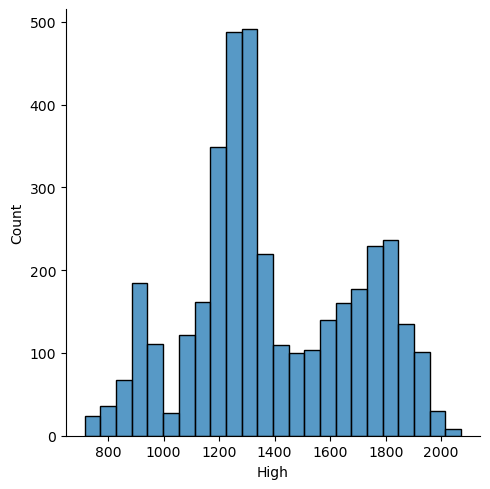

In [9]:
sns.displot(data["High"])

In [10]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(3050, 4)
(763, 4)
(3050,)
(763,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [13]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  25.14048662040492
RMSE:-  5.0140289808102345
R2_score:-  0.9997329877342713


In [15]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\16ary\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.877e+04, tolerance: 2.662e+04
  model = cd_fast.enet_coordinate_descent(


In [16]:
calculate_metrics(y_test, la_p)

MSE:-  65.70457250045355
RMSE:-  8.105835706480459
R2_score:-  0.9993021643917648


In [17]:
calculate_metrics(y_test, ri_p)

MSE:-  25.14053916736288
RMSE:-  5.014034220800939
R2_score:-  0.9997329871761802


In [18]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.109 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.038 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.034 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.052 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.063 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.109 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.038 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.034 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.052 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.108 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.020 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.025 total time=   0.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.020 total time=   0.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.019 total time=   0.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.266 total time=   1.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.263 total time=   1.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.312 total time=   0.9s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

C:\Users\16ary\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but Ridge is expecting 4 features as input.